In [1]:
import pandas as pd
import numpy as np

In [2]:
#Sets up the datetime/accession number
def first_cleanse(file):
    df = pd.read_csv(file)
    df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
    df = df.set_index(df['datetime'])
    df = df.drop(['date','time','datetime'],axis=1)
    return df

In [3]:
filename = 'testing05'

In [4]:
df = first_cleanse(filename)

In [5]:
def filterer(df,threshold):
    df['Counts'] = (df.groupby(['datetime'])['accession'].transform('count'))
    df['Normalized'] = (df['Counts']-min(df['Counts'])) / (max(df['Counts']) - min(df['Counts']))
    return df[df['Normalized'] > threshold]

490377

In [6]:
df['Normalized'] = (df['Counts']-min(df['Counts'])) / (max(df['Counts']) - min(df['Counts']))

In [7]:
#I feel as though here, I could write a math thing that would auto solve this problem of finding x where x is the percentage needed to take half of the documents

half = .5*df.shape[0]
df_filtered = df[df['Normalized'] > .25]
print(df_filtered.shape[0], half)

227300 245188.5


In [8]:
df_filtered

,accession,Counts,Normalized
datetime,,,
2006-06-30 00:00:25,0000950134-06-004429,10,0.346154
2006-06-30 00:00:25,0001125282-06-002603,10,0.346154
2006-06-30 00:00:25,0001047469-06-005753,10,0.346154
2006-06-30 00:00:25,0000950123-04-014977,10,0.346154
2006-06-30 00:00:25,0001181431-04-031072,10,0.346154
...,...,...,...
2006-06-30 23:59:53,0001193125-04-017196,9,0.307692
2006-06-30 23:59:53,0001209191-05-001828,9,0.307692
2006-06-30 23:59:53,0001209191-05-001828,9,0.307692


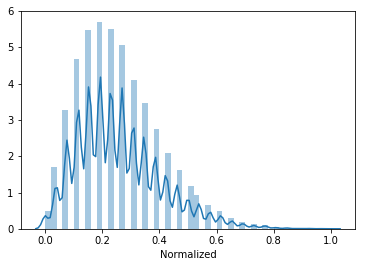

In [14]:
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

#sns.distplot(df['Counts'])
sns.distplot(df['Normalized'])

(array([732491.95833333, 732492.08333333, 732492.20833333, 732492.33333333,
        732492.45833333, 732492.58333333, 732492.70833333, 732492.83333333,
        732492.95833333]), <a list of 9 Text xticklabel objects>)

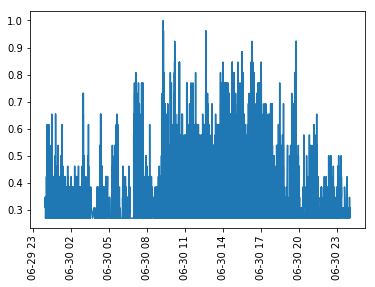

In [22]:
plt.plot(df_filtered.index.to_pydatetime(), df_filtered['Normalized'])
plt.xticks(rotation=90)